In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as anim

In [2]:
def build_stand(n,vig_pct,vig_thresh,n_inf0,trees_per_acre):
    
    stand = np.zeros((n,n))
    trees = stand[2:-2,2:-2]
    trees = np.random.rand(n-4,n-4)

    indices = np.random.choice((n-4)**2, size=((n-4)**2)-(trees_per_acre*10), replace=False) # 0.5 value should be determined by the trees per acre
    trees.ravel()[indices] = 0
    stand[2:-2,2:-2] = trees

    # of the values that are not zero (the trees) populate some vig_pct of them below vig_thresh
    # turn the values at the nonzero indices into zeros
    live_trees =np.nonzero(stand)
    live_trees_1 = np.zeros(len(live_trees[0]))

    # Get an array the size of live_trees and make vig_pct of them below vig_thresh
    num_low_values = int(vig_pct*len(live_trees_1))
    low_value_ind = np.random.choice(len(live_trees_1), num_low_values, replace=False)
    live_trees_1.flat[low_value_ind]=np.random.uniform(0,vig_thresh,size=num_low_values)

    high_value_ind = np.setdiff1d(np.arange(len(live_trees_1)), low_value_ind)
    live_trees_1.flat[high_value_ind] = np.random.uniform(vig_thresh,1,size=len(live_trees_1)-num_low_values)

    # make that array the live_trees in stand 
    stand[live_trees] = live_trees_1
    
    for i in range(n_inf0):
        row,col = random.sample(range(2,n-2), 2)
        stand[row,col] = 1
            
    return stand

<IPython.core.display.Javascript object>


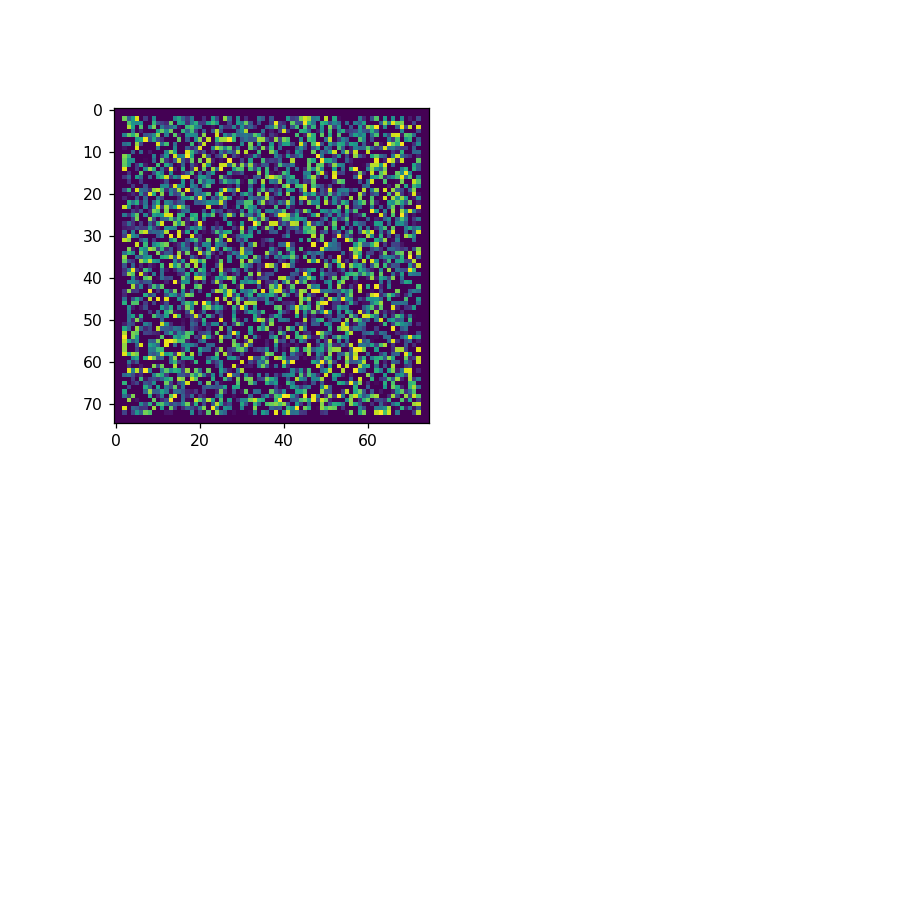

In [327]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
plt.imshow(stand)

In [259]:
def update(n,stand,vig_thresh):
        # check trees for beatle if treehealth = 1 then infested = true
        n = np.shape(stand)[0]
        inf = []
        for i in range(n):
            for j in range(n):
                if stand[i, j] == 1:
                    inf.append([i, j])

        stand_new = stand.copy()
        for idx in range(len(inf)):
            # check neighboring trees for bad health and make a list of them
            bad_trees = []
            bad_ind = []
            i, j = inf[idx]
            
            # Inner Circle
            # N
            if 0 < stand[(i - 1), j] < vig_thresh:
                bad_trees.append(stand[(i - 1), j])
                bad_ind.append([(i - 1), j])

            # S
            if 0 < stand[(i + 1), j] < vig_thresh:
                bad_trees.append(stand[(i + 1), j])
                bad_ind.append([(i + 1), j])

            # E
            if 0 < stand[i, (j + 1)] < vig_thresh:
                bad_trees.append(stand[i, (j + 1)])
                bad_ind.append([i, (j + 1)])

            # W
            if 0 < stand[i, (j - 1)] < vig_thresh:
                bad_trees.append(stand[i, (j - 1)])
                bad_ind.append([i, (j - 1)])

            # NE
            if 0 < stand[(i - 1), (j + 1)] < vig_thresh:
                bad_trees.append(stand[(i - 1), (j + 1)])
                bad_ind.append([(i - 1), (j + 1)])

            # NW
            if 0 < stand[(i - 1), (j - 1)] < vig_thresh:
                bad_trees.append(stand[(i - 1), (j - 1)])
                bad_ind.append([(i - 1), (j - 1)])

            # SE
            if 0 < stand[(i + 1), (j + 1)] < vig_thresh:
                bad_trees.append(stand[(i + 1), (j + 1)])
                bad_ind.append([(i + 1), (j + 1)])

            # SW
            if 0 < stand[(i + 1), (j - 1)] < vig_thresh:
                bad_trees.append(stand[(i + 1), (j - 1)])
                bad_ind.append([(i + 1), (j - 1)])
            
            # Outer Circle
            if 0 < stand[(i - 2), j] < vig_thresh:
                bad_trees.append(stand[(i - 2), j])
                bad_ind.append([(i - 2), j])
                
            if 0 < stand[(i + 2), j] < vig_thresh:
                bad_trees.append(stand[(i + 2), j])
                bad_ind.append([(i + 2), j])
                
            if 0 < stand[i, (j-2)] < vig_thresh:
                bad_trees.append(stand[i , (j-2)])
                bad_ind.append([i , (j-2)])
                
            if 0 < stand[i, (j+2)] < vig_thresh:
                bad_trees.append(stand[i , (j+2)])
                bad_ind.append([i , (j+2)])
            
            if 0 < stand[(i+2), (j+2)] < vig_thresh:
                bad_trees.append(stand[(i+2) , (j+2)])
                bad_ind.append([(i+2) , (j+2)])
            
            if 0 < stand[(i-2), (j-2)] < vig_thresh:
                bad_trees.append(stand[(i-2) , (j-2)])
                bad_ind.append([(i-2) , (j-2)])
            
            if 0 < stand[(i+2), (j-2)] < vig_thresh:
                bad_trees.append(stand[(i+2) , (j-2)])
                bad_ind.append([(i+2) , (j-2)])
            
            if 0 < stand[(i-2), (j+2)] < vig_thresh:
                bad_trees.append(stand[(i-2) , (j+2)])
                bad_ind.append([(i-2) , (j+2)])
                
            
            if 0 < stand[(i-1), (j-2)] < vig_thresh:
                bad_trees.append(stand[(i-1) , (j-2)])
                bad_ind.append([(i-1) , (j-2)])
            
            if 0 < stand[(i+1), (j-2)] < vig_thresh:
                bad_trees.append(stand[(i+1) , (j-2)])
                bad_ind.append([(i+1) , (j-2)])
                
            
            if 0 < stand[(i-1), (j+2)] < vig_thresh:
                bad_trees.append(stand[(i-1) , (j+2)])
                bad_ind.append([(i-1) , (j+2)])
            
            if 0 < stand[(i+1), (j+2)] < vig_thresh:
                bad_trees.append(stand[(i+1) , (j+2)])
                bad_ind.append([(i+1) , (j+2)])
                
            
            if 0 < stand[(i-2), (j-1)] < vig_thresh:
                bad_trees.append(stand[(i-2) , (j-1)])
                bad_ind.append([(i-2) , (j-1)])
            
            if 0 < stand[(i-2), (j+1)] < vig_thresh:
                bad_trees.append(stand[(i-2) , (j+1)])
                bad_ind.append([(i-2) , (j+1)])
                
            
            if 0 < stand[(i+2), (j-1)] < vig_thresh:
                bad_trees.append(stand[(i+2) , (j-1)])
                bad_ind.append([(i+2) , (j-1)])
            
            if 0 < stand[(i+2), (j+1)] < vig_thresh:
                bad_trees.append(stand[(i+2) , (j+1)])
                bad_ind.append([(i+2) , (j+1)])
            
            
            # trees with worst health becomes newly infected tree
            if len(bad_trees)<=2:
                for k in range(len(bad_trees)):
                    stand_new[bad_ind[k][0],bad_ind[k][1]]=1
                stand_new[i,j]=0
            else:
                tree_idx = np.argpartition(bad_trees,2)
                worst_tree1,worst_tree2 = tree_idx[:2][0],tree_idx[:2][1]
                bad_i,bad_j=bad_ind[worst_tree1][0],bad_ind[worst_tree1][1] 
                stand_new[bad_i,bad_j]=1
                if worst_tree2 <= vig_thresh/1.5: 
                    bad_k,bad_l = bad_ind[worst_tree2][0],bad_ind[worst_tree2][1]
                    stand_new[bad_k,bad_l]=1

                stand_new[i,j]=0

        inf = []
        for i in range(n):
            for j in range(n):
                if stand_new[i, j] == 1:
                    inf.append([i, j])
        return stand_new

In [208]:
def beatle_trials(n,stand,n_inf0,n_trials,vig_thresh,n_years):
    dead_trees = []
    pct_dead = []
    for i in range(n_trials):
        stand0=np.copy(stand)

        # number of initialy infested trees and location
        for i in range(n_inf0):
            row,col = random.sample(range(2,len(stand0)-2), 2)
            stand0[row,col] = 1
        
        # spread of infestation
        states = []
        old = np.copy(stand0)
        for i in range(n_years):
            old = update(n,old,vig_thresh)
            states.append(old)
        
        
        #count number of dead trees
        
        final_state = states[-1]

        n_live0 = np.count_nonzero(stand0!=0)-n_inf0 
        n_live_final = np.count_nonzero(final_state!=0)-np.count_nonzero(final_state==1)
        dead_tree_count = n_live0-n_live_final
        mort = dead_tree_count/n_live0
        
        
        pct_dead.append(mort)
        dead_trees.append(dead_tree_count)
        
    return dead_trees, pct_dead, states

In [186]:
n=20 #size of stand
n_inf0 = 1 # number of initialy infested trees
vig_thresh=0.3 # suceptable trees are trees with vigor below 0.8
vig_pct = 0.8 # percentage of trees below the the vig_thresh
trees_per_acre = 25
n_years = 50
n_trials = 1000

stand = build_stand(n,vig_pct,vig_thresh,n_inf0,trees_per_acre)
dead_trees,pct_dead,states = beatle_trials(n,stand,n_inf0,n_trials,vig_thresh,n_years)

In [187]:
n=75 #size of stand
n_inf0 = 1 # number of initialy infested trees
vig_thresh=0.3 # suceptable trees are trees with vigor below 0.8
vig_pct = 0.5 # percentage of trees below the the vig_thresh
trees_per_acre = 250
n_years = 50
n_trials = 1000

# BA
# SDI

stand = build_stand(n,vig_pct,vig_thresh,n_inf0,trees_per_acre)
dead_trees, pct_dead, states = beatle_trials(n,stand,n_inf0,n_trials,vig_thresh,n_years)

<IPython.core.display.Javascript object>


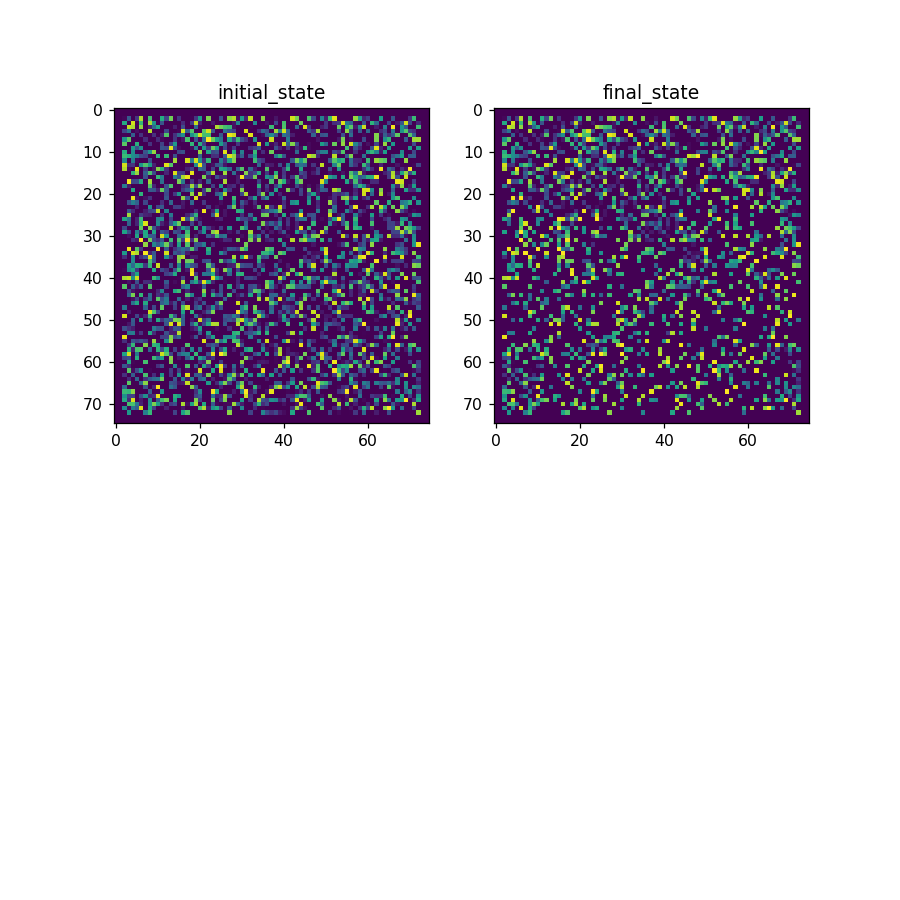

<function matplotlib.pyplot.show(block=None)>

In [188]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
plt.imshow(stand)
plt.title('initial_state')
fig.add_subplot(2,2,2)
plt.title('final_state')
plt.imshow(states[-1])
plt.show

<IPython.core.display.Javascript object>


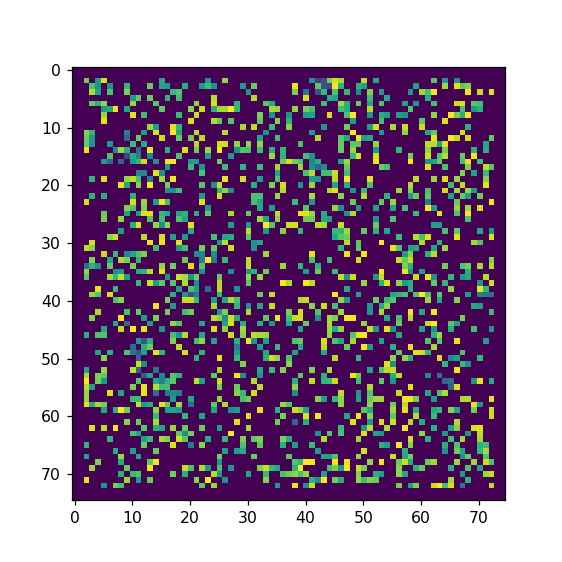

In [320]:
%matplotlib notebook

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states[0])

def animate(frame_number):
    im.set_data(states[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=900)

<IPython.core.display.Javascript object>


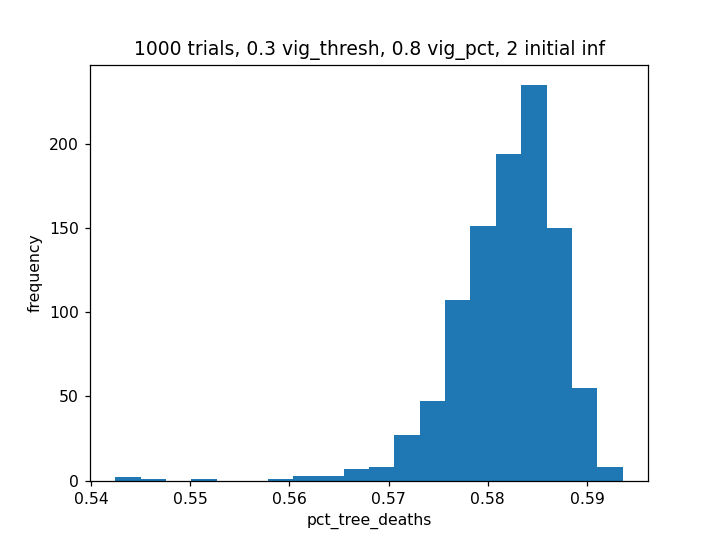

Text(0.5, 1.0, '1000 trials, 0.3 vig_thresh, 0.8 vig_pct, 2 initial inf')

In [321]:
%matplotlib notebook
plt.hist(pct_dead,bins=20)
plt.xlabel('pct_tree_deaths')
plt.ylabel('frequency')
plt.title('1000 trials, 0.3 vig_thresh, 0.8 vig_pct, 2 initial inf')

## Stand 1 (Healthy)

In [314]:
n1=75 #size of stand
n_inf01 = 10 # number of initialy infested trees
vig_thresh1=0.3 # suceptable trees are trees with vigor below vig_thresh
vig_pct1 = 0.30 # percentage of trees below the the vig_thresh
trees_per_acre1 = 250
n_years1 = 50
n_trials1 = 1000

stand1 = build_stand(n1,vig_pct1,vig_thresh1,n_inf01,trees_per_acre1)
dead_trees1, pct_dead1, states1 = beatle_trials(n1,stand1,n_inf01,n_trials1,vig_thresh1,n_years1)

<IPython.core.display.Javascript object>


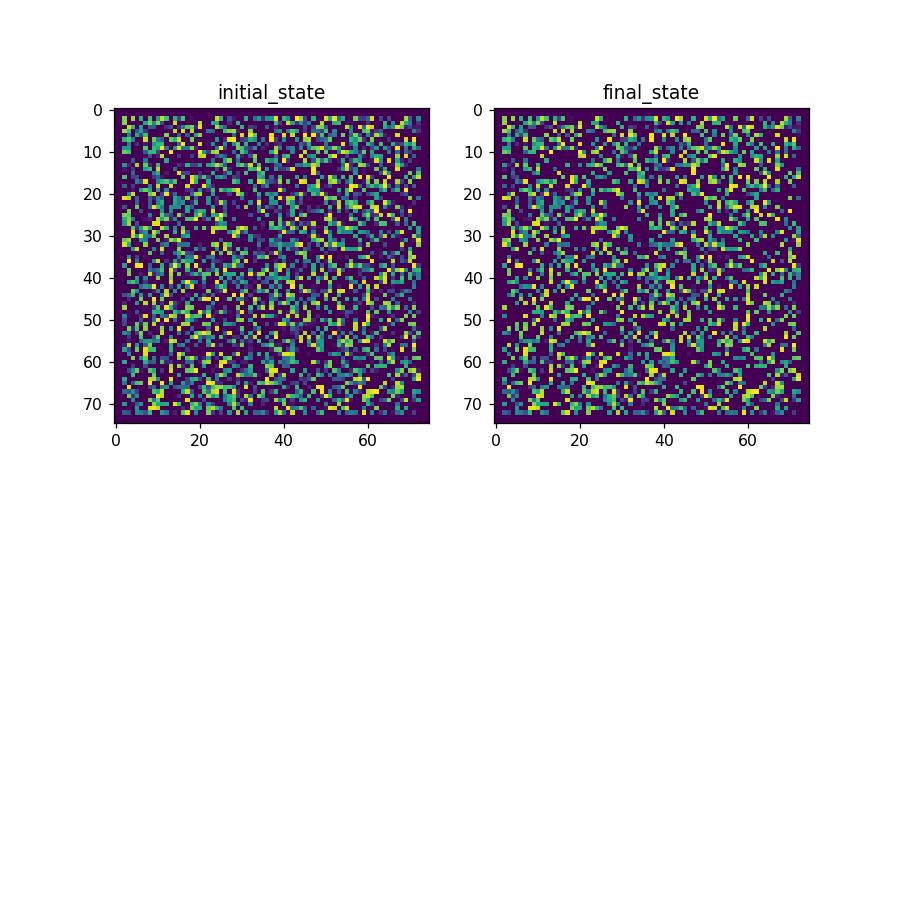

In [339]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
plt.imshow(stand1)
plt.title('initial_state')
fig.add_subplot(2,2,2)
plt.title('final_state')
plt.imshow(states1[-1])
plt.show
plt.savefig('stand1')

<IPython.core.display.Javascript object>


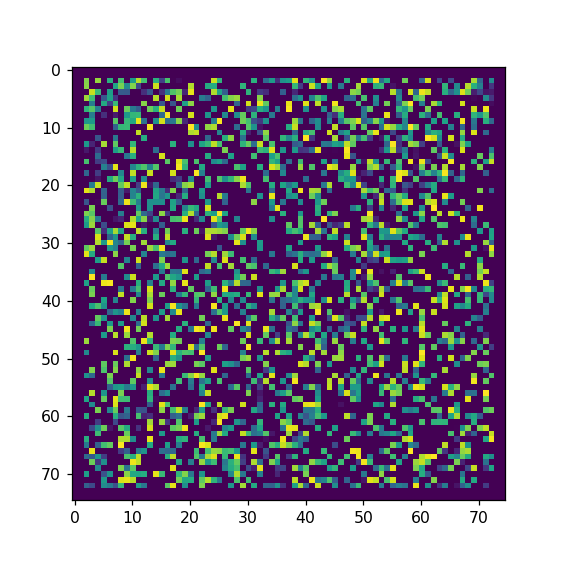

In [336]:
%matplotlib notebook

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states1[0])

def animate(frame_number):
    im.set_data(states1[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states1), interval=900)

<IPython.core.display.Javascript object>


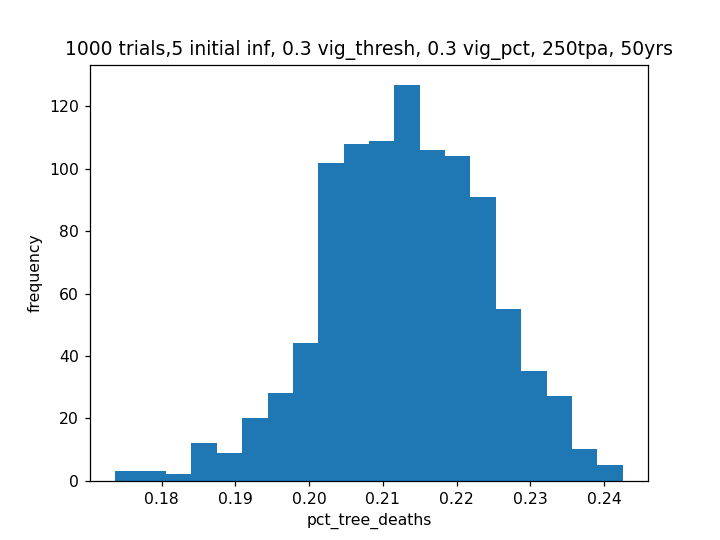

In [340]:
%matplotlib notebook
plt.hist(pct_dead1,bins=20)
plt.xlabel('pct_tree_deaths')
plt.ylabel('frequency')
plt.title('1000 trials,5 initial inf, 0.3 vig_thresh, 0.3 vig_pct, 250tpa, 50yrs')
plt.savefig('stand1_hist')

## Stand 2 (complete recycle of old stand)

In [293]:
n2=75 #size of stand
n_inf02 = 150 # number of initialy infested trees
vig_thresh2=0.3 # suceptable trees are trees with vigor below vig_thresh
vig_pct2 = 0.9 # percentage of trees below the the vig_thresh
trees_per_acre2 = 250
n_years2 = 10
n_trials2 = 1000

# BA
# SDI

stand2 = build_stand(n2,vig_pct2,vig_thresh2,n_inf02,trees_per_acre2)
dead_trees2, pct_dead2, states2 = beatle_trials(n2,stand2,n_inf02,n_trials2,vig_thresh2,n_years2)

<IPython.core.display.Javascript object>


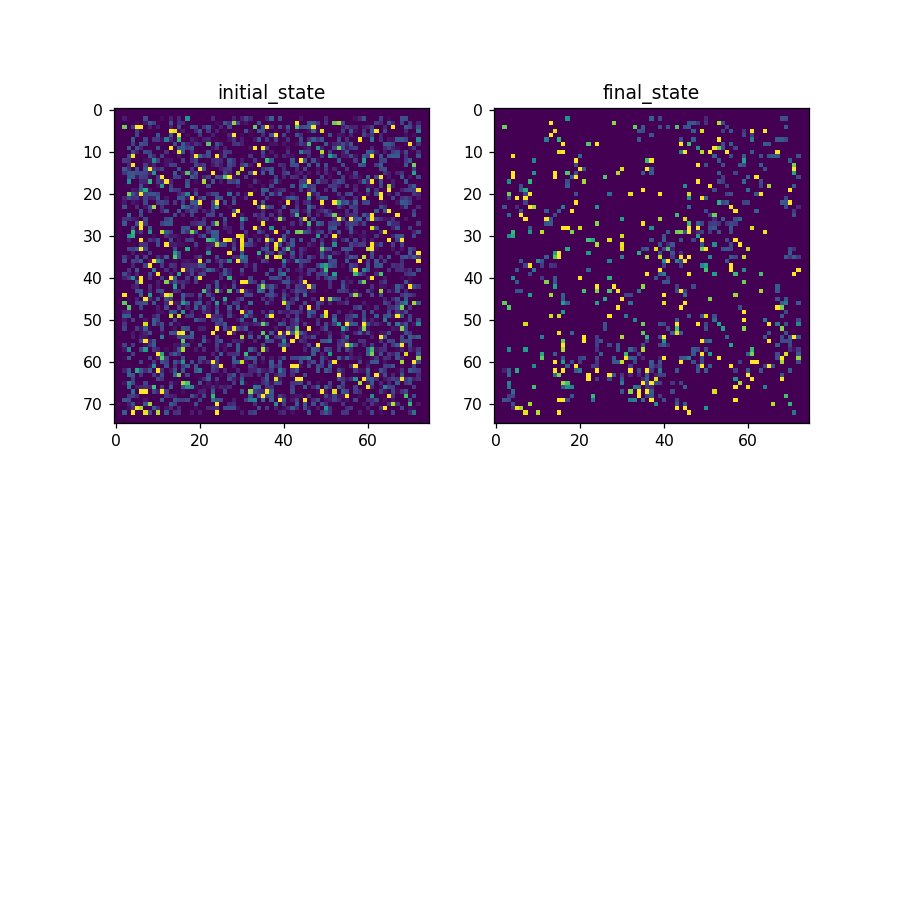

<function matplotlib.pyplot.show(block=None)>

In [299]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,2,1)
plt.imshow(stand2)
plt.title('initial_state')
fig.add_subplot(2,2,2)
plt.title('final_state')
plt.imshow(states2[-1])
plt.show
#plt.savefig('stand2_complete_recycle')

<IPython.core.display.Javascript object>


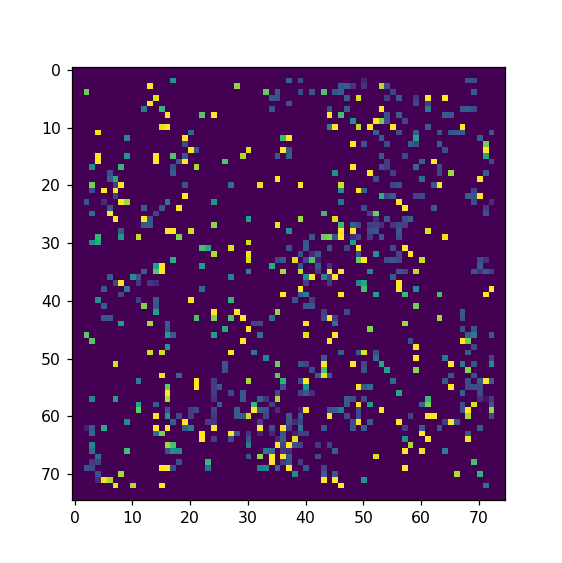

In [338]:
%matplotlib notebook

fig,ax = plt.subplots()
fig.set_size_inches(5,5)

im = ax.imshow(states2[0])

def animate(frame_number):
    im.set_data(states2[frame_number])
    return im
    
animation = anim.FuncAnimation(fig, animate, frames=len(states), interval=900)

<IPython.core.display.Javascript object>


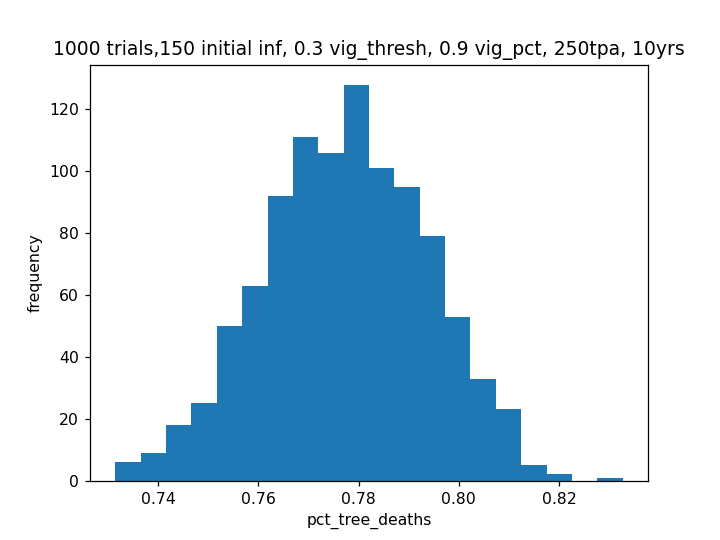

In [341]:
%matplotlib notebook
plt.hist(pct_dead2,bins=20)
plt.xlabel('pct_tree_deaths')
plt.ylabel('frequency')
plt.title('1000 trials,150 initial inf, 0.3 vig_thresh, 0.9 vig_pct, 250tpa, 10yrs')
plt.savefig('stand2_hist')